
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


## Answer
(a)

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
pred_all = regressor.predict(x_all)
print'Mean Squared Error on test data:', mean_squared_error(y_test, pred)

Mean Squared Error on test data: 1204.2491913174892


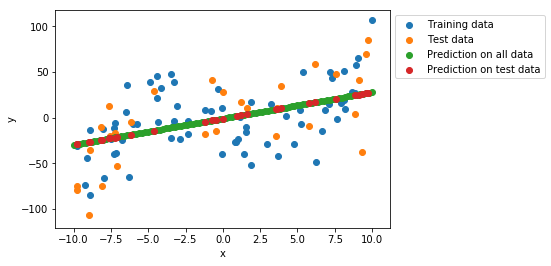

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train, marker='o', label='Training data')
plt.scatter(x_test, y_test, marker='o', label='Test data')
plt.scatter(x_all, pred_all, marker='o', label='Prediction on all data')
plt.scatter(x_test, pred, marker='o', label='Prediction on test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

(b)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly2= PolynomialFeatures(degree=2)
xtrain_poly2 = poly2.fit_transform(x_train)
xtest_poly2 = poly2.fit_transform(x_test)
xall_poly2 = poly2.fit_transform(x_all)
regressor.fit(xtrain_poly2, y_train)
ytrain_poly2_pred = regressor.predict(xtrain_poly2)
ytest_poly2_pred = regressor.predict(xtest_poly2)
yall_poly2_pred = regressor.predict(xall_poly2)
print'Mean Squared Error on train data for degree 2:', mean_squared_error(y_train, ytrain_poly2_pred)
print'Mean Squared Error on test data for degree 2:', mean_squared_error(y_test, ytest_poly2_pred)

Mean Squared Error on train data for degree 2: 959.5190206385591
Mean Squared Error on test data for degree 2: 1276.3920769678755


In [5]:
poly3= PolynomialFeatures(degree=3)
xtrain_poly3 = poly3.fit_transform(x_train)
xtest_poly3 = poly3.fit_transform(x_test)
xall_poly3 = poly3.fit_transform(x_all)
regressor.fit(xtrain_poly3, y_train)
ytrain_poly3_pred = regressor.predict(xtrain_poly3)
ytest_poly3_pred = regressor.predict(xtest_poly3)
yall_poly3_pred = regressor.predict(xall_poly3)
print'Mean Squared Error on train data for degree 3:', mean_squared_error(y_train, ytrain_poly3_pred)
print'Mean Squared Error on test data for degree 3:', mean_squared_error(y_test, ytest_poly3_pred)

Mean Squared Error on train data for degree 3: 624.5354778268198
Mean Squared Error on test data for degree 3: 1152.28399170982


In [6]:
poly4= PolynomialFeatures(degree=4)
xtrain_poly4 = poly4.fit_transform(x_train)
xtest_poly4 = poly4.fit_transform(x_test)
xall_poly4 = poly4.fit_transform(x_all)
regressor.fit(xtrain_poly4, y_train)
ytrain_poly4_pred = regressor.predict(xtrain_poly4)
ytest_poly4_pred = regressor.predict(xtest_poly4)
yall_poly4_pred = regressor.predict(xall_poly4)
print'Mean Squared Error on train data for degree 4:', mean_squared_error(y_train, ytrain_poly4_pred)
print'Mean Squared Error on test data for degree 4:', mean_squared_error(y_test, ytest_poly4_pred)

Mean Squared Error on train data for degree 4: 622.4127493286283
Mean Squared Error on test data for degree 4: 1183.1992247368405


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#MLP Regression models for (b)
from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_1.fit(x_train, y_train)
mlp_1_pred_train = mlp_1.predict(x_train)
mlp_1_pred_test = mlp_1.predict(x_test)
mlp_1_pred_all = mlp_1.predict(x_all)
print'Mean Squared Error on train data for MLP Regressor 1:', mean_squared_error(y_train, mlp_1_pred_train)
print'Mean Squared Error on test data for MLP Regressor 1:', mean_squared_error(y_test, mlp_1_pred_test)

Mean Squared Error on train data for MLP Regressor 1: 647.2281467598511
Mean Squared Error on test data for MLP Regressor 1: 1098.8196621363998


In [9]:
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')
mlp_2.fit(x_train, y_train)
mlp_2_pred_train = mlp_2.predict(x_train)
mlp_2_pred_test = mlp_2.predict(x_test)
mlp_2_pred_all = mlp_2.predict(x_all)
print'Mean Squared Error on train data for MLP Regressor 2:', mean_squared_error(y_train, mlp_2_pred_train)
print'Mean Squared Error on test data for MLP Regressor 2:', mean_squared_error(y_test, mlp_2_pred_test)

Mean Squared Error on train data for MLP Regressor 2: 1029.3514306571046
Mean Squared Error on test data for MLP Regressor 2: 1442.660019846679


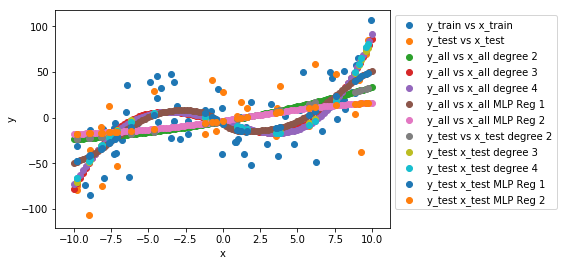

In [10]:
plt.scatter(x_train,y_train, label = 'y_train vs x_train')
plt.scatter(x_test,y_test, label = 'y_test vs x_test')
plt.scatter(x_all,yall_poly2_pred, label = 'y_all vs x_all degree 2')
plt.scatter(x_all,yall_poly3_pred, label = 'y_all vs x_all degree 3')
plt.scatter(x_all,yall_poly4_pred, label = 'y_all vs x_all degree 4')
plt.scatter(x_all,mlp_1_pred_all, label = 'y_all vs x_all MLP Reg 1')
plt.scatter(x_all,mlp_2_pred_all, label = 'y_all vs x_all MLP Reg 2')

plt.scatter(x_test,ytest_poly2_pred, label = 'y_test vs x_test degree 2')
plt.scatter(x_test,ytest_poly3_pred, label = 'y_test x_test degree 3')
plt.scatter(x_test,ytest_poly4_pred, label = 'y_test x_test degree 4')
plt.scatter(x_test,mlp_1_pred_test, label = 'y_test x_test MLP Reg 1')
plt.scatter(x_test,mlp_2_pred_test, label = 'y_test x_test MLP Reg 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

(c) 

Answer:

The model with polynomial degree 3 performs the best with a MSE of 1152.28. However, when we increase the complexity of the model to polynomial degree 4 the MSE increases to 1183.20. This happens because the model starts following the training sample too closely and does not perform well on the test data. On increasing model complexity the bias decreases but the variance increases. The decrease in bias is less than than the increase in variance. Therefore the model fit worsens and the MSE value is increased.

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


1.

In [11]:
n= 100
w_true = np.arange(10)+1
x = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))
y= np.matmul(x,w_true)+e
y[:5]

array([19.38099011, 35.63238016, 27.58060541, 29.2977313 , 23.53961707])

2.

In [12]:
regressor.fit(x, y)
pred2 = regressor.predict(x)
print'Mean Squared Error:', mean_squared_error(y, pred2)

Mean Squared Error: 0.8251407849539479


3.

In [13]:
n= 50
x_test_q3 = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))
y_test_q3= np.matmul(x_test_q3,w_true,)+e
y_test_q3[:5]

array([34.56716018, 22.22066245, 27.48463377, 26.87383078, 22.20411916])

In [14]:
mse_values = {}
for num_data_points in range(20, 1001):
    x_train_q3 = np.random.uniform(size=(num_data_points, 10))
    e = np.random.normal(size=(num_data_points))
    y_train_q3= np.matmul(x_train_q3,w_true)+e
    regressor.fit(x_train_q3, y_train_q3)
    pred3 = regressor.predict(x_test_q3)
    mse_values[num_data_points] = mean_squared_error(y_test_q3, pred3)

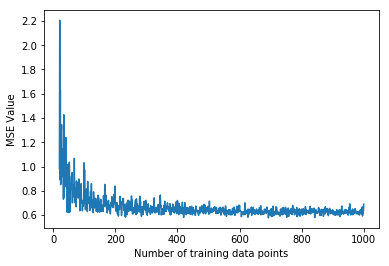

In [15]:
import matplotlib.pylab as plt
sorted_mse_values = sorted(mse_values.items()) 
x, y = zip(*sorted_mse_values) 
plt.plot(x, y)
plt.xlabel("Number of training data points")
plt.ylabel("MSE Value")
plt.show()

In [16]:
n_min_mse = min(mse_values, key=mse_values.get)
w_true = np.arange(10)+1
x = np.random.uniform(size=(n_min_mse, 10))
e = np.random.normal(size=(n_min_mse))
y= np.matmul(x,w_true)+e
regressor.fit(x, y)
print regressor.coef_

[0.96436805 2.08834875 3.19461856 4.14995533 5.17956447 5.94569015
 6.83409796 8.25106696 8.48181967 9.93725382]


4. 

In [17]:
data_points = []
for i in range(1,10): 
    mse_values = {}
    mse_values2 = {}
    for num_data_points in range(20, 1001):
        w_true = np.arange(10)+1
        x = np.random.uniform(size=(num_data_points, 10))
        e = np.random.normal(size=(num_data_points))
        y = np.matmul(x,w_true)+e
        regressor.fit(x, y)
        mse_values[num_data_points] = mean_squared_error(w_true, regressor.coef_)
        mse_values2 = dict( (key, value) for (key, value) in mse_values.items() if value < 0.01 )
    n_min_mse2 = min(mse_values2, key=mse_values2.get)
    data_points.append(n_min_mse2)
print 'Average number of data points for MSE(coefficients)<0.01 is', np.mean(data_points)

Average number of data points for MSE(coefficients)<0.01 is 829.3333333333334


In [18]:
data_points = []
for i in range(1,10): 
    mse_values = {}
    mse_values2 = {}
    for num_data_points in range(20, 1001):
        w_true_3 = w_true[0:3]
        x_3 = np.random.uniform(size=(num_data_points, 3))
        e_3 = np.random.normal(size=(num_data_points))
        y_3= np.matmul(x_3,w_true_3)+e_3
        regressor.fit(x_3, y_3)
        mse_values[num_data_points] = mean_squared_error(w_true_3, regressor.coef_)
        mse_values2 = dict( (key, value) for (key, value) in mse_values.items() if value < 0.01 )
    n_min_mse2 = min(mse_values2, key=mse_values2.get)
    data_points.append(n_min_mse2)
print 'Average number of data points for MSE(coefficients)<0.01 (when x is 3 dimensaional) is', np.mean(data_points)

Average number of data points for MSE(coefficients)<0.01 (when x is 3 dimensaional) is 702.8888888888889


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [19]:
from pandas import Series, DataFrame
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)


Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


### Answer

In [20]:
dataset.describe()

,ViolentCrimesPerPop,PolicBudgPerPop,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PolicCars,PctUnemployed,PctEmploy
count,1994.000000,319.000000,1795.000000,1596.000000,1848.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,319.000000,1895.000000,1895.000000
mean,0.237979,0.195078,0.056641,0.464123,0.066310,0.696269,0.361123,0.350251,0.065231,0.232854,0.163103,0.363182,0.501340
std,0.232985,0.164718,0.122465,0.163635,0.132721,0.444811,0.209362,0.191109,0.109459,0.203092,0.214778,0.201943,0.173407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,0.110000,0.010000,0.350000,0.000000,0.000000,0.200000,0.220000,0.020000,0.100000,0.040000,0.215000,0.380000
50%,0.150000,0.150000,0.020000,0.440000,0.030000,1.000000,0.320000,0.300000,0.040000,0.170000,0.080000,0.320000,0.510000
75%,0.330000,0.220000,0.050000,0.540000,0.070000,1.000000,0.490000,0.430000,0.070000,0.280000,0.195000,0.480000,0.630000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Lets look at PolicBudgPerPop and PolicCars columns first since they have almost 84% missing values. These columns contain data related to police and it might be possible that police data was not available for most of the localities.

In [21]:
len(dataset[['PolicBudgPerPop','PolicCars']][dataset[['PolicBudgPerPop','PolicCars']].isnull().all(axis=1)])/float(len(dataset))*100

84.00200601805416

#### PolicBudgPerPop and PolicCar have null values for the same records which confirm that the police data was not available altogether for 84% of the localities. As per my intuition, the values are missing completely at random but to confirm lets check the correlation of these variables with other variables.

In [22]:
dataset.corr()[abs(dataset.corr()) > 0.5]

,ViolentCrimesPerPop,PolicBudgPerPop,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PolicCars,PctUnemployed,PctEmploy
ViolentCrimesPerPop,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicBudgPerPop,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,1.000000,NaN,0.992792,NaN,NaN,NaN,0.700500,NaN,0.806645,NaN,NaN
householdsize,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numbUrban,NaN,NaN,0.992792,NaN,1.000000,NaN,NaN,NaN,0.696982,NaN,0.792503,NaN,NaN
pctUrban,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medIncome,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.894175,NaN,NaN,NaN,-0.652243,0.641330
perCapInc,NaN,NaN,NaN,NaN,NaN,NaN,0.894175,1.000000,NaN,NaN,NaN,-0.656078,NaN
LandArea,NaN,NaN,0.700500,NaN,0.696982,NaN,NaN,NaN,1.000000,NaN,0.681779,NaN,NaN
PopDens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


#### From the above table I can see that PolicBudgPerPop is not highly correlated with any other variable so it is missing completely at random. It is better to drop this column and not use it in the model. It is missing 84% of the values and imputing it with any value wouldn't be a good idea.

#### PolicCars is highly correlated with a few columns. Not lets check if the missingness in the column PolicCars is related to any of these columns.

In [23]:
dataset['PolicCars_null_flag'] = np.where(dataset['PolicCars'].isnull(), 1,0) 

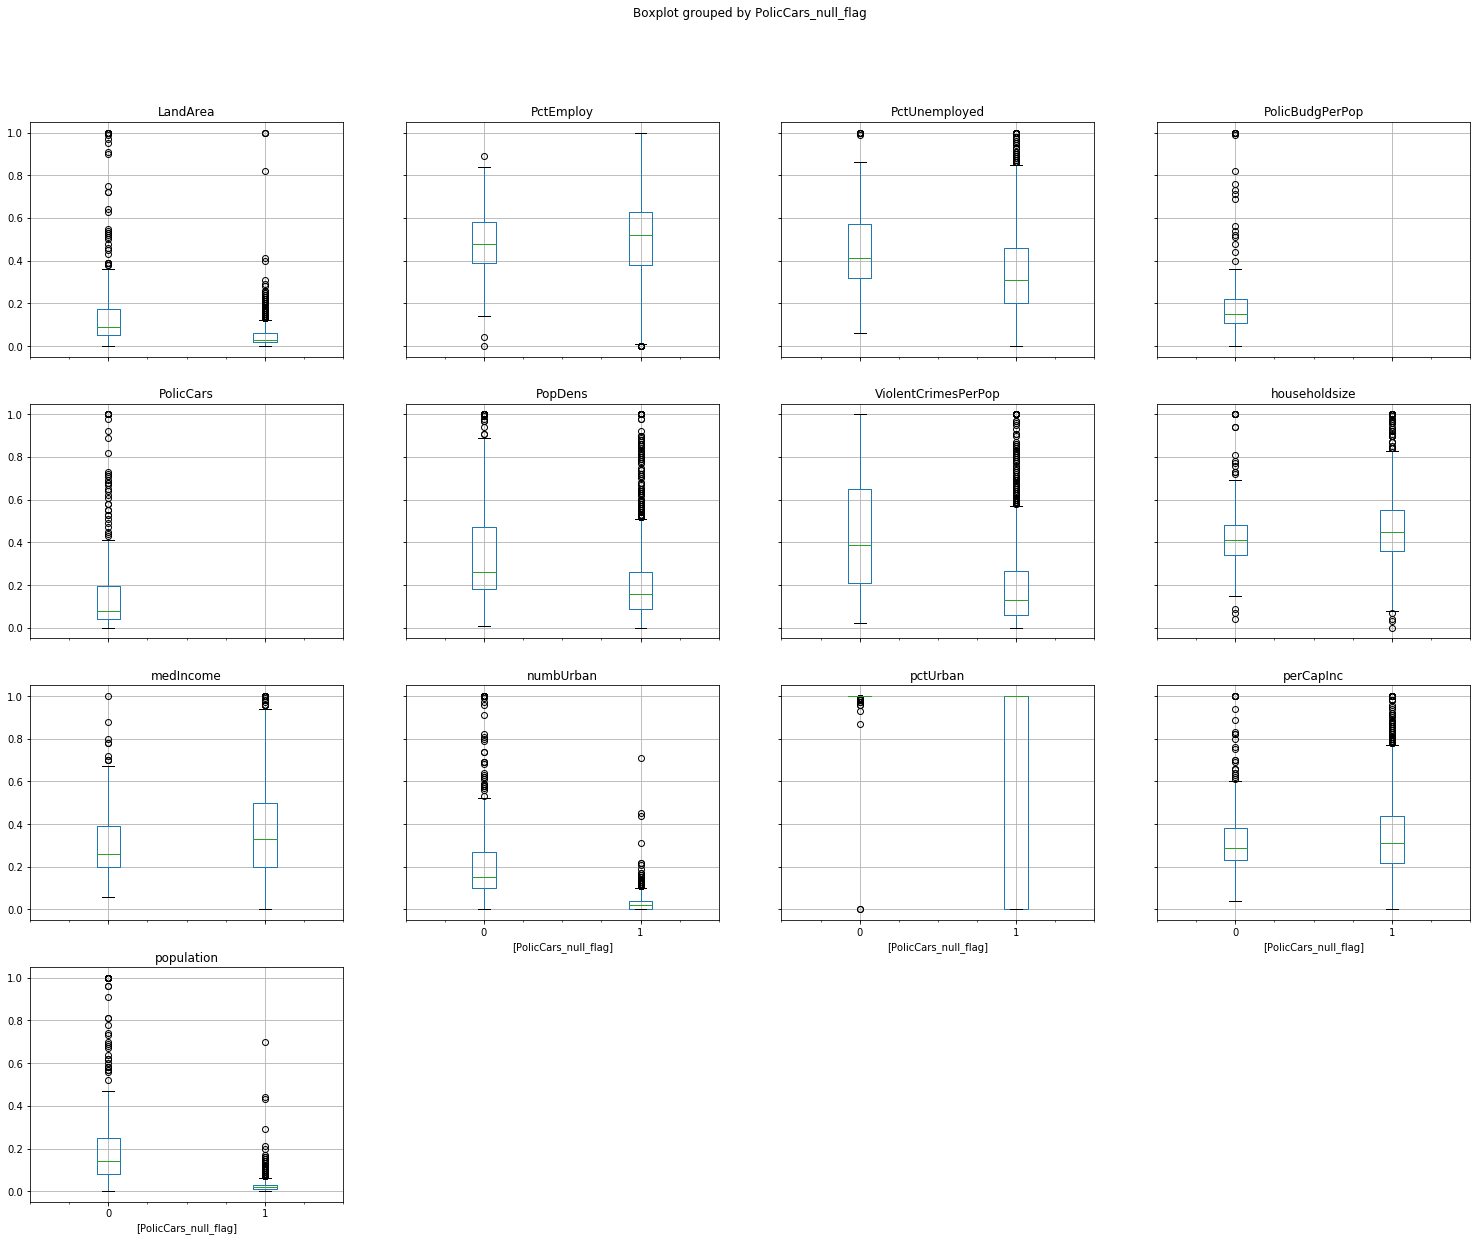

In [24]:
import matplotlib.pyplot as plt
dataset.boxplot(by = 'PolicCars_null_flag',figsize=(25,20))
plt.show()

#### From the boxplot we can see that the value of the variables population, LandArea, numbUrban are different for the records when PolicCars is null and when it is not null. Values of population, LandArea and numbUrban are low for popluations with missing PolicCars value. One hypothesis can be that since such populations have low population, LandArea and numbUrban they did not care to calculate the PolicCars values for those populations.
#### This means that the PolicCars value for the missing records are definitely different than the records where they have values. We can try to run model by using the PolicCars_null_flag in place of the PolicCars column and check how it performs.

#### PctUnemployed and PctEmploy are missing for the same records which indicate that the employment details for those localities are either not available or the localities do not want to disclose that information. Lets check the histogram plots for these two variables

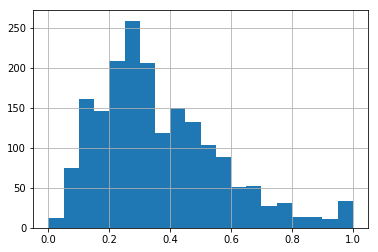

In [25]:
dataset['PctUnemployed'].hist(bins=20)

In [26]:
print 'Mean:', dataset['PctUnemployed'].mean()
print 'Median', dataset['PctUnemployed'].median()

Mean: 0.363182058047
Median 0.32


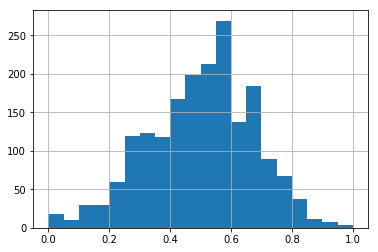

In [27]:
dataset['PctEmploy'].hist(bins=20)

In [28]:
print 'Mean:', dataset['PctEmploy'].mean()
print 'Median', dataset['PctEmploy'].median()

Mean: 0.501340369393
Median 0.51


#### From the histogram it can be seen that PctUnemployed is right skewed and therefore we can impute the missing values with the median of the remaining values.
#### From the histogram it can be seen that PctEmploy is symmetrically distributed and therefore we can impute the missing values with the mean or median (which is almost the same) of the remaining values.

#### Now lets check the distribution of the rest of the variables which have missing values

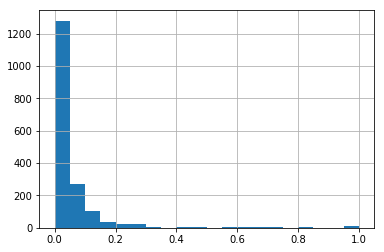

In [29]:
dataset['population'].hist(bins=20)

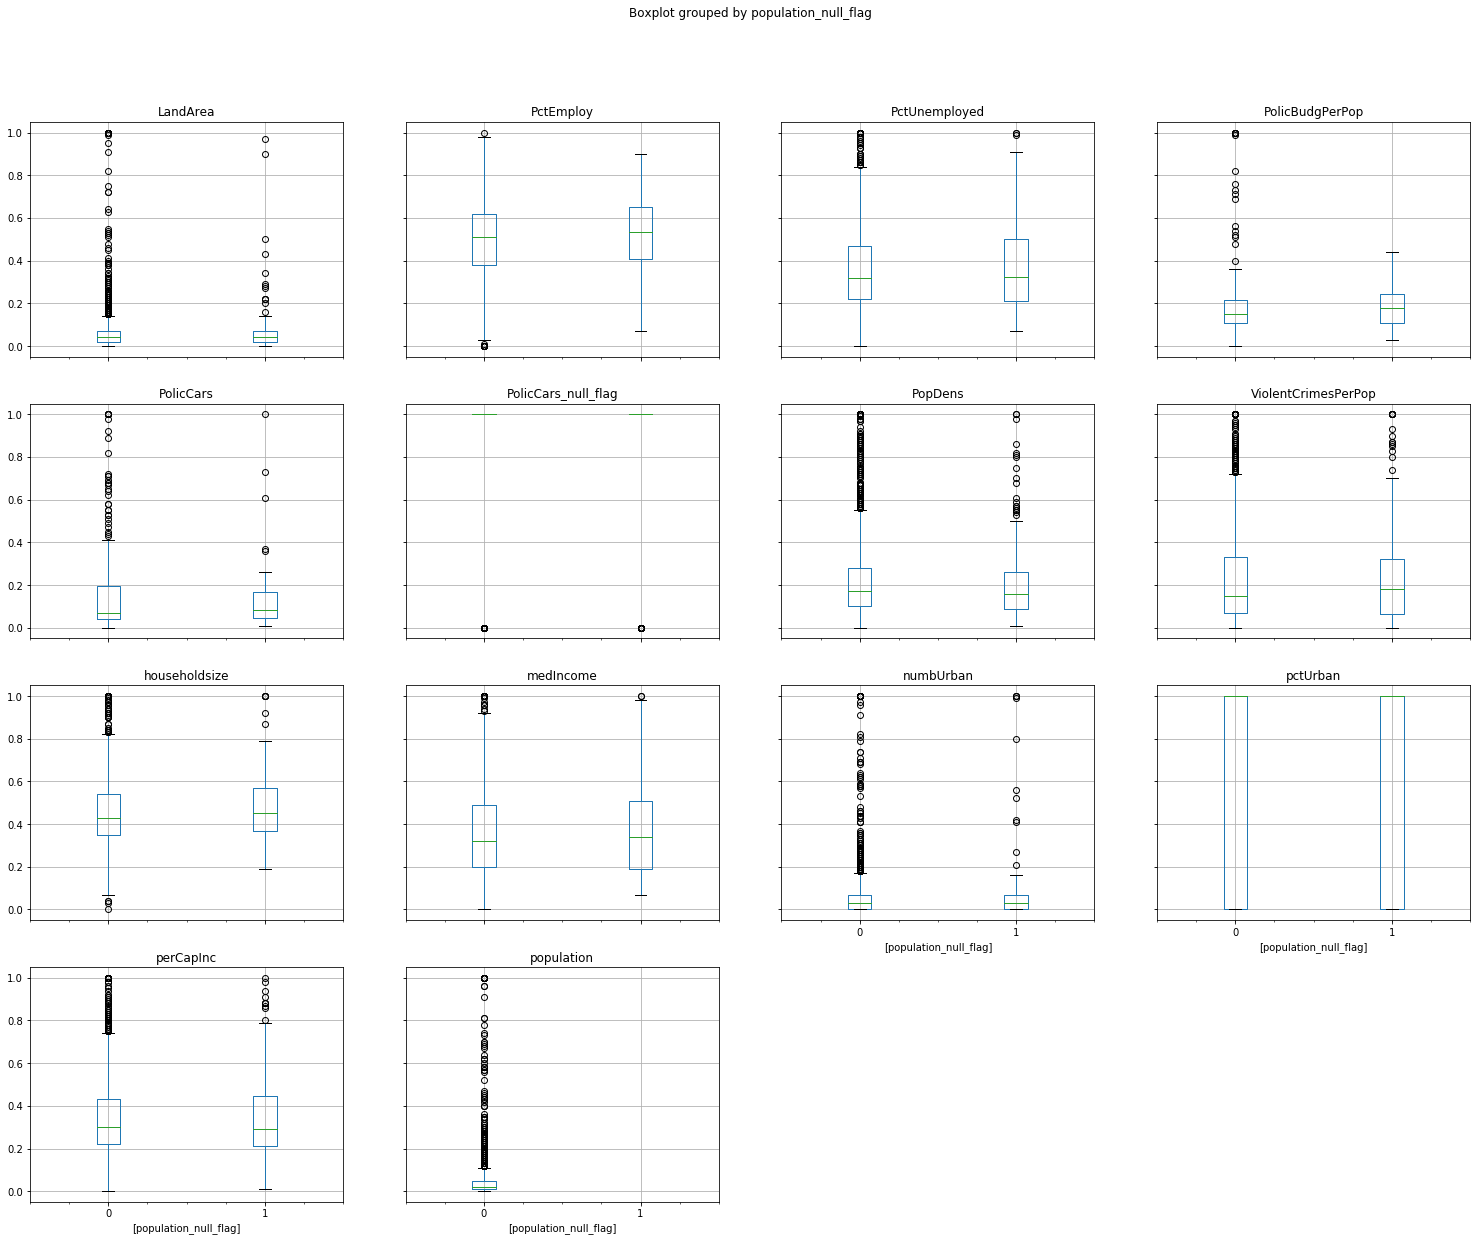

In [30]:
dataset['population_null_flag'] = np.where(dataset['population'].isnull(), 1,0) 
dataset.boxplot(by = 'population_null_flag',figsize=(25,20))
plt.show()

#### The distribution of the population variable is right skewed. The values of other variables are pretty much same when population values are null and not null (as seen in the boxplot). 
#### One strategy can be to impute the missing values by the median of  the remaining values

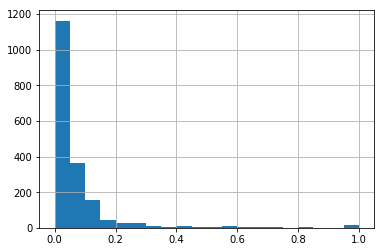

In [31]:
dataset['numbUrban'].hist(bins=20)

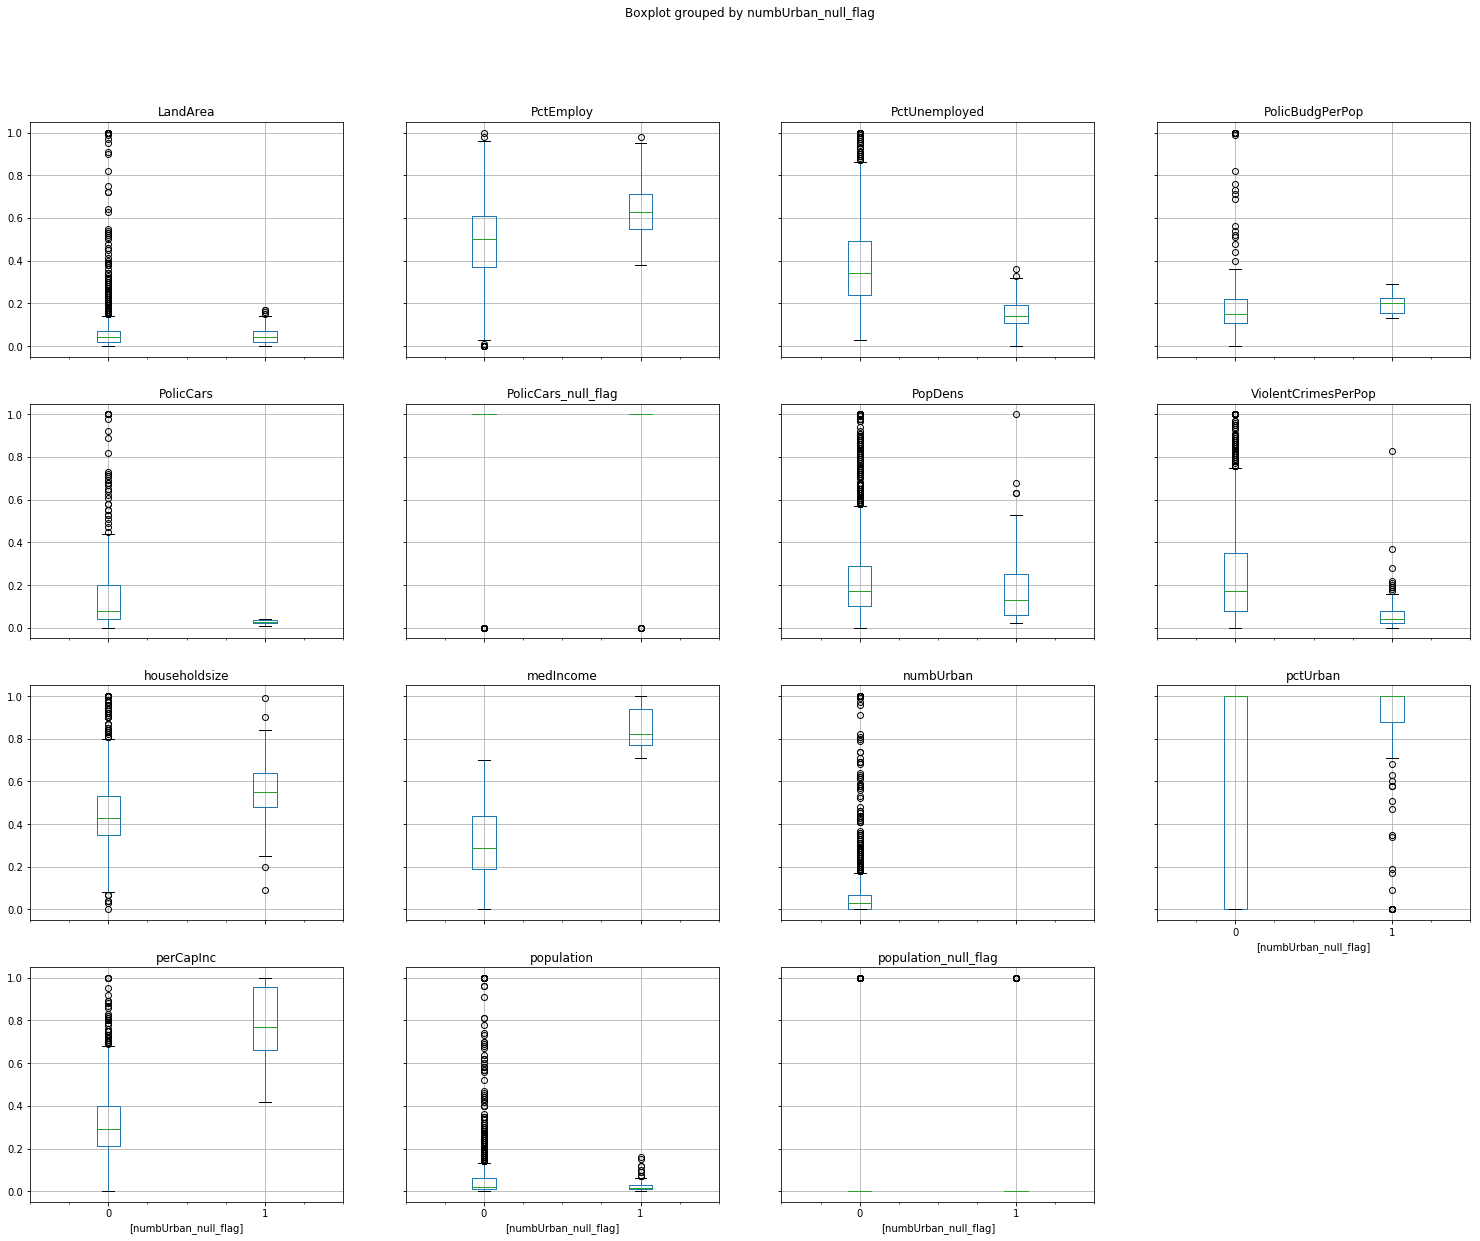

In [32]:
dataset['numbUrban_null_flag'] = np.where(dataset['numbUrban'].isnull(), 1,0) 
dataset.boxplot(by = 'numbUrban_null_flag',figsize=(25,20))
plt.show()

#### The distribution of the numbUrban variable is also right skewed. The value of median income, pct Urban anfd per Capita income  is higher for populations with null value of numbUrban variable.
#### But since numbUrban is just missing for 7% of thr values, we can impute the missing values with the median value

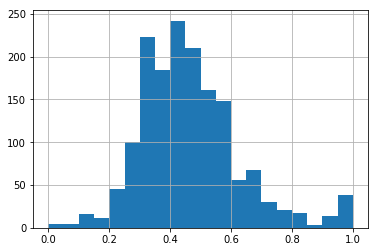

In [33]:
dataset['householdsize'].hist(bins=20)

In [34]:
print 'Mean:', dataset['householdsize'].mean()
print 'Median', dataset['householdsize'].median()

Mean: 0.464122807018
Median 0.44


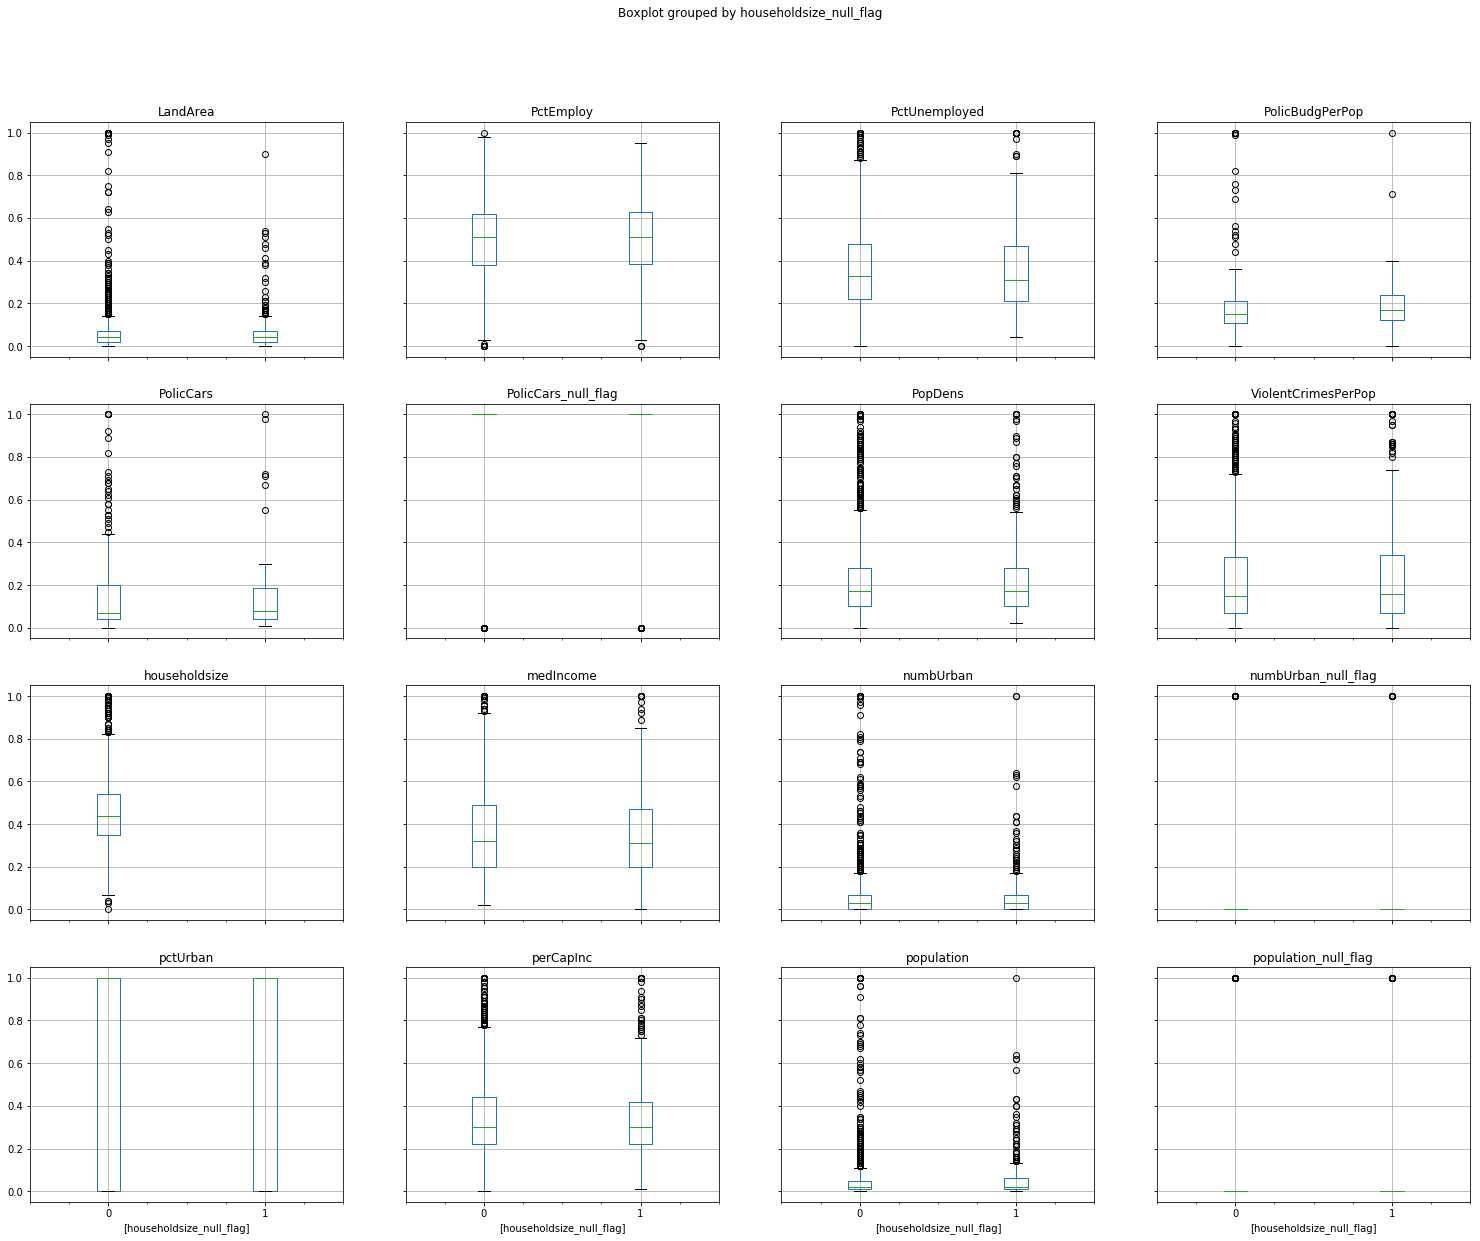

In [35]:
dataset['householdsize_null_flag'] = np.where(dataset['householdsize'].isnull(), 1,0) 
dataset.boxplot(by = 'householdsize_null_flag',figsize=(25,20))
plt.show()

#### The distribution of the households variable is symmetrically distributed. The values of other variables are pretty much same when population values are null and not null (as seen in the boxplot). 
#### One strategy can be to impute the missing values by the mean of  the remaining values.

#### Strategy Implementation:

In [36]:
dataset1 = dataset.drop(['PolicBudgPerPop'],axis=1)
dataset1 = dataset1.drop(['PolicCars'],axis=1)
dataset1['PctUnemployed'] = dataset1['PctUnemployed'].fillna(dataset['PctUnemployed'].median())
dataset1['PctEmploy'] = dataset1['PctEmploy'].fillna(dataset['PctEmploy'].mean())
dataset1['population'] = dataset1['population'].fillna(dataset['population'].median())
dataset1['numbUrban'] = dataset1['numbUrban'].fillna(dataset['numbUrban'].median())
dataset1['householdsize'] = dataset1['householdsize'].fillna(dataset['householdsize'].mean())

In [37]:
X1 = dataset1.drop(['ViolentCrimesPerPop'],axis=1)
Y1 = dataset1['ViolentCrimesPerPop']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size = 0.30, random_state=11)
regressor = linear_model.LinearRegression()
regressor.fit(X1_train, Y1_train)
pred_train = regressor.predict(X1_train)
pred_test = regressor.predict(X1_test)
print'Mean Squared Error on train data:', mean_squared_error(Y1_train, pred_train)
print'Mean Squared Error on test data:', mean_squared_error(Y1_test, pred_test)

Mean Squared Error on train data: 0.03027260168088629
Mean Squared Error on test data: 0.03505083706688531


# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer:

False. The goal of PCA is to create a lower dimensional representation with principal components that best represent the variance of the whole model. It is a dimensionality reduction technique which uses Singular Value Decomposition to project data points to a lower dimension. This method seeks to find linear combinations of input variables known as as principal components so that they capture most of the variance (information)

Therefore the goal of PCA is to retain as much variance from the original variance and minimize the square loss.